### Importing Necessary Libraries

In [77]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import datetime as dt

plt.style.use('ggplot')
sns.set(style="white")

### Reading in the formatted bike share data

In [78]:
df = pd.read_json('cleaned_bike_share_data.json')

### Generating a scatterplot of the number of bikes used between 2011 - 2012

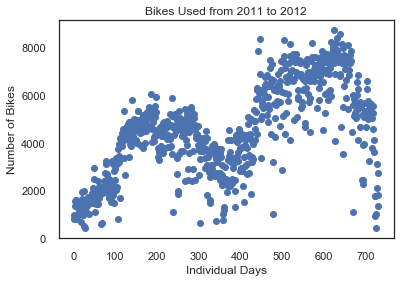

In [82]:
plt.scatter(df.instant, df.cnt)
plt.xlabel('Individual Days')
plt.ylabel('Number of Bikes')
plt.title('Bikes Used from 2011 to 2012')
plt.show()

## Creating a Polynomial Regression Line
### Tools used:
##### ScikitLearn - For PolynomialFeatures, fitting the model, and predicting y-values
##### Matplotlib - For generating our graph with the regression line


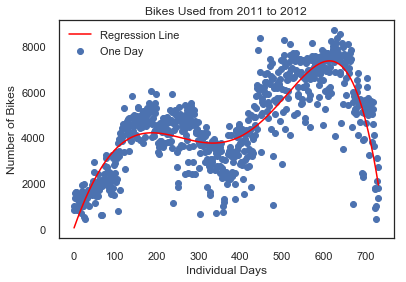

(-17.114003764909285, 52.23977569074059)

In [84]:
# Assigning proper values
x=df.instant.values.reshape(-1,1)
y=df.cnt.values.reshape(-1,1)

# Regression
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

predictions = model.predict(x_poly)

# Plotting
plt.scatter(df['instant'], df['cnt'], label='One Day')
plt.plot(df['instant'],predictions,c='red', label='Regression Line')
plt.xlabel('Individual Days')
plt.ylabel('Number of Bikes')
plt.title('Bikes Used from 2011 to 2012')
plt.legend()
plt.show()

model.intercept_[0], model.coef_[0][1]


### Creating a Residual Function

In [5]:
# Calculates the difference between the predicted values and the actual values
def resid(x,y_actual):
    return (model.intercept_[0] + sum([model.coef_[0][i] * x**i for i in range(len(model.coef_[0]))])) -  y_actual

In [85]:
# Storing predicted values into a new column
df['resids'] = resid(df['instant'], df['cnt'])
df

,atemp,casual,clear,cnt,dteday,fall,holiday,hum,instant,light_storm,...,summer,temp,weather,weathersit,weekday,windspeed,winter,workingday,yr,resids
0,0.363625,331,1,985,734138,0,0,0.805833,1,0,...,0,0.344167,clear,2,6,0.160446,1,0,0,-950.051064
1,0.353739,131,1,801,734139,0,0,0.696087,2,0,...,0,0.363478,clear,2,0,0.248539,1,0,0,-714.341934
2,0.189405,120,0,1349,734140,0,0,0.437273,3,0,...,0,0.196364,misty,1,1,0.248309,1,1,0,-1210.986806
3,0.212122,108,0,1562,734141,0,0,0.590435,4,0,...,0,0.200000,misty,1,2,0.160296,1,1,0,-1372.985849
4,0.229270,82,0,1600,734142,0,0,0.436957,5,0,...,0,0.226957,misty,1,3,0.186900,1,1,0,-1360.339215
5,0.233209,88,0,1606,734143,0,0,0.518261,6,0,...,0,0.204348,misty,1,4,0.089565,1,1,0,-1316.047031
6,0.208839,148,1,1510,734144,0,0,0.498696,7,0,...,0,0.196522,clear,2,5,0.168726,1,1,0,-1170.109405
7,0.162254,68,1,959,734145,0,0,0.535833,8,0,...,0,0.165000,clear,2,6,0.266804,1,0,0,-569.526426
8,0.116175,54,0,822,734146,0,0,0.434167,9,0,...,0,0.138333,misty,1,0,0.361950,1,0,0,-383.298158
9,0.150888,41,0,1321,734147,0,0,0.482917,10,0,...,0,0.150833,misty,1,1,0.223267,1,1,0,-833.424650


#### Graphing the residual values derived from the function above

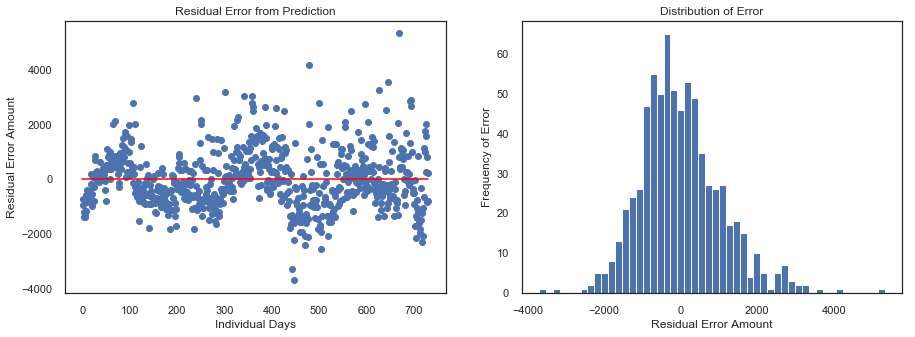

In [121]:
# Scatterplot of our Residuals
fig, ax = plt.subplots(1,2, figsize=(15,5))
x = np.linspace(0,730,730)
y = np.array([0 for i in range(len(x))])
ax[0].scatter(df['instant'], df['resids'])
ax[0].plot(x,y, c='red')
ax[0].set_xlabel('Individual Days')
ax[0].set_ylabel('Residual Error Amount')
ax[0].set_title('Residual Error from Prediction')

# Distribution of our Residuals
# fig = plt.figure()
# fig.add_subplot(111)
ax[1].hist(df['resids'], bins=50)
ax[1].set_xlabel('Residual Error Amount')
ax[1].set_ylabel('Frequency of Error')
ax[1].set_title('Distribution of Error')

plt.show()

### Summary Table of the Relationship between the Residual Values and Selected Features

In [38]:
lr_model = ols(formula='resids~temp*hum*windspeed*(fall+winter+spring+summer)*(clear+misty+light_storm)', data=df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 resids   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     8.178
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           2.25e-58
Time:                        15:36:40   Log-Likelihood:                -5866.3
No. Observations:                 730   AIC:                         1.190e+04
Df Residuals:                     648   BIC:                         1.227e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -2.133e+04   4.56e+04     -0.468      0.640   -1.11e+05    6.81e+04
temp                                   3.816e+04   6.47e+04      0.590      0.556   -8.89e+04    1.65e+05
hum                                    2.545e+04   5.15e+04      0.494      0.621   -7.57e+04    1.27e+05
temp:hum                              -5.016e+04   6.92e+04     -0.725      0.469   -1.86e+05    8.58e+04
windspeed                              8.684e+04   2.86e+05      0.303      0.762   -4.75e+05    6.49e+05
temp:windspeed                          -1.9e+05   4.86e+05     -0.391      0.696   -1.14e+06    7.65e+05
hum:windspeed                         -9.639e+04   3.27e+05     -0.295      0.768   -7.38e+05    5.45e+05
temp:hum:windspeed                      2.33e+05   5.39e+05      0.432      0.666   -8.26e+05    1.29e+06
fall                                  -3.229e+04   2.58e+04     -1.253      0.210   -8.29e+04    1.83e+04
winter                                -3490.4400   2.33e+04     -0.150      0.881   -4.93e+04    4.23e+04
spring                                 1.001e+04   8373.294      1.195      0.232   -6435.447    2.64e+04
summer                                 4440.1474   2.47e+04      0.180      0.858   -4.41e+04     5.3e+04
temp:fall                              6.596e+04   5.76e+04      1.146      0.252   -4.71e+04    1.79e+05
temp:winter                            4169.8974   1.87e+04      0.223      0.824   -3.25e+04    4.09e+04
temp:spring                           -2.426e+04    1.3e+04     -1.868      0.062   -4.98e+04    1244.574
temp:summer                           -7707.3516   3.51e+04     -0.220      0.826   -7.66e+04    6.12e+04
hum:fall                               3.387e+04      3e+04      1.128      0.260   -2.51e+04    9.28e+04
hum:winter                             6881.8339   2.53e+04      0.272      0.785   -4.27e+04    5.65e+04
hum:spring                            -1.544e+04   1.14e+04     -1.355      0.176   -3.78e+04    6941.652
hum:summer                              140.9479   3.59e+04      0.004      0.997   -7.04e+04    7.07e+04
temp:hum:fall                          -6.56e+04   7.03e+04     -0.934      0.351   -2.04e+05    7.24e+04
temp:hum:winter                       -1.965e+04   1.88e+04     -1.047      0.296   -5.65e+04    1.72e+04
temp:hum:spring                        3.106e+04    1.9e+04      1.636      0.102   -6230.368    6.83e+04
temp:hum:summer                        4029.1456   5.12e+04      0.079      0.937   -9.64e+04    1.05e+05
windspeed:fall                         1.641e+05   2.89e+05      0.567      0.571   -4.04e+05    7.32e+05
windspeed:winter                       3.174e+04   3.78e+04      0.839      0.402   -4.26e+04    1.06e+05
windspeed

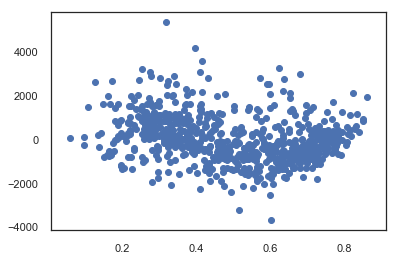

In [88]:
# Relationship between temperature and residual values
plt.scatter(df['temp'], df['resids'])

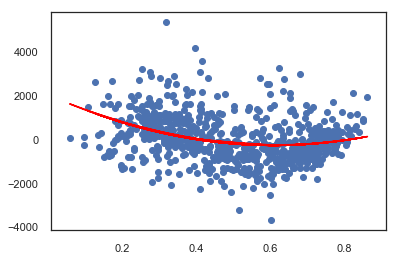

(2032.9371908384546, array([    0.        , -7637.45776516,  6276.76899313]))

In [56]:
x=df.temp.values.reshape(-1,1)
y=df.resids.values.reshape(-1,1)

# Regression
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

predictions = model.predict(x_poly)

# Plotting
plt.scatter(df['temp'], df['resids'])
plt.plot(df['temp'],predictions,c='red')
plt.show()

model.intercept_[0], model.coef_[0]


In [57]:
df['temp_resids'] = resid(df.temp, df.resids)
df.temp_resids.mean()

-2.7284841053187846e-13

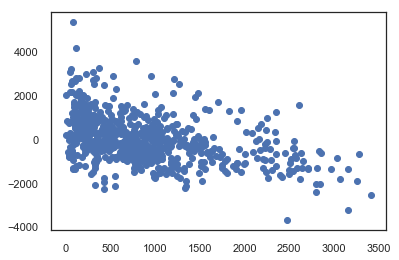

In [61]:
plt.scatter(df.casual, df.resids)